In [1]:
import geopandas as gpd
import osmnx as ox
import json as js
from shapely.geometry import Point, Polygon, MultiPolygon
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__


# G = ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='drive')
# ox.plot_graph(G)

'0.10'

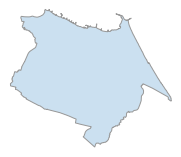

In [20]:
city = ox.gdf_from_place('Fortaleza, Ceará, Brasil')
# ox.save_gdf_shapefile(city)
# city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(3,3))

In [21]:
polygonis = Polygon(city['geometry'][0])

# Categorias desejadas
amenities = ['hospital', 'school', 'restaurant', 'supermarket', 'pharmacy', 'bank', 
             'fast_food', 'dentist', 'post_office', 
             'bar', 'bbq', 'biergarten', 'cafe', 'food_court', 'ice_cream', 'pub',
             'college', 'kindergarten', 'library', 'public_bookcase', 'university']

# Colunas desejadas
columns = ['ais','name','amenity','addr:city','addr:housenumber','addr:postcode','addr:street','lat','lon']

# Das colunas desejadas, aquelas que não podem conter nenhum elemento nulo
not_null_columns = ['amenity', 'lat', 'lon']

pois = ox.pois.create_poi_gdf(polygon = polygonis, amenities = amenities)
pois.to_csv('pointsOfInteresting.csv', sep=',', encoding='utf-8', index=False)